In [ ]:
#!pip uninstall numpy
#!pip install numpy
!pip install pretty_html_table


In [ ]:
import pandas as pd
import os
import re
import numpy
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from pretty_html_table import build_table
import IPython


%matplotlib inline





In [ ]:
#cargamos el archivo sin tratar el campo service_code para obtener graficos iniciales con la información en bruto
df = pd.read_csv("/content/train.csv")
print(len(df))

40594


In [ ]:

#creamos un campo nuevo datetime en el que registramos la fecha
df["requested_datetime"] = df["requested_datetime"].apply(lambda x: x[0:10] )
df["fecha"] =  pd.to_datetime(df["requested_datetime"], format='%Y-%m-%d')

#creamos u dataframe nuevo agrupando por año
df1 = df.groupby(df['fecha'].dt.year).size().reset_index(name='Count')
output = build_table(df1, 'blue_light')



output= build_table(df1, 'blue_light')
IPython.display.HTML(output)



fecha,Count
2017,3743
2018,4061
2019,3580
2020,4703
2021,8109
2022,7939
2023,8459


<ipython-input-9-7d7c03dee1b8>:11: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(30)
<ipython-input-9-7d7c03dee1b8>:13: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(30)


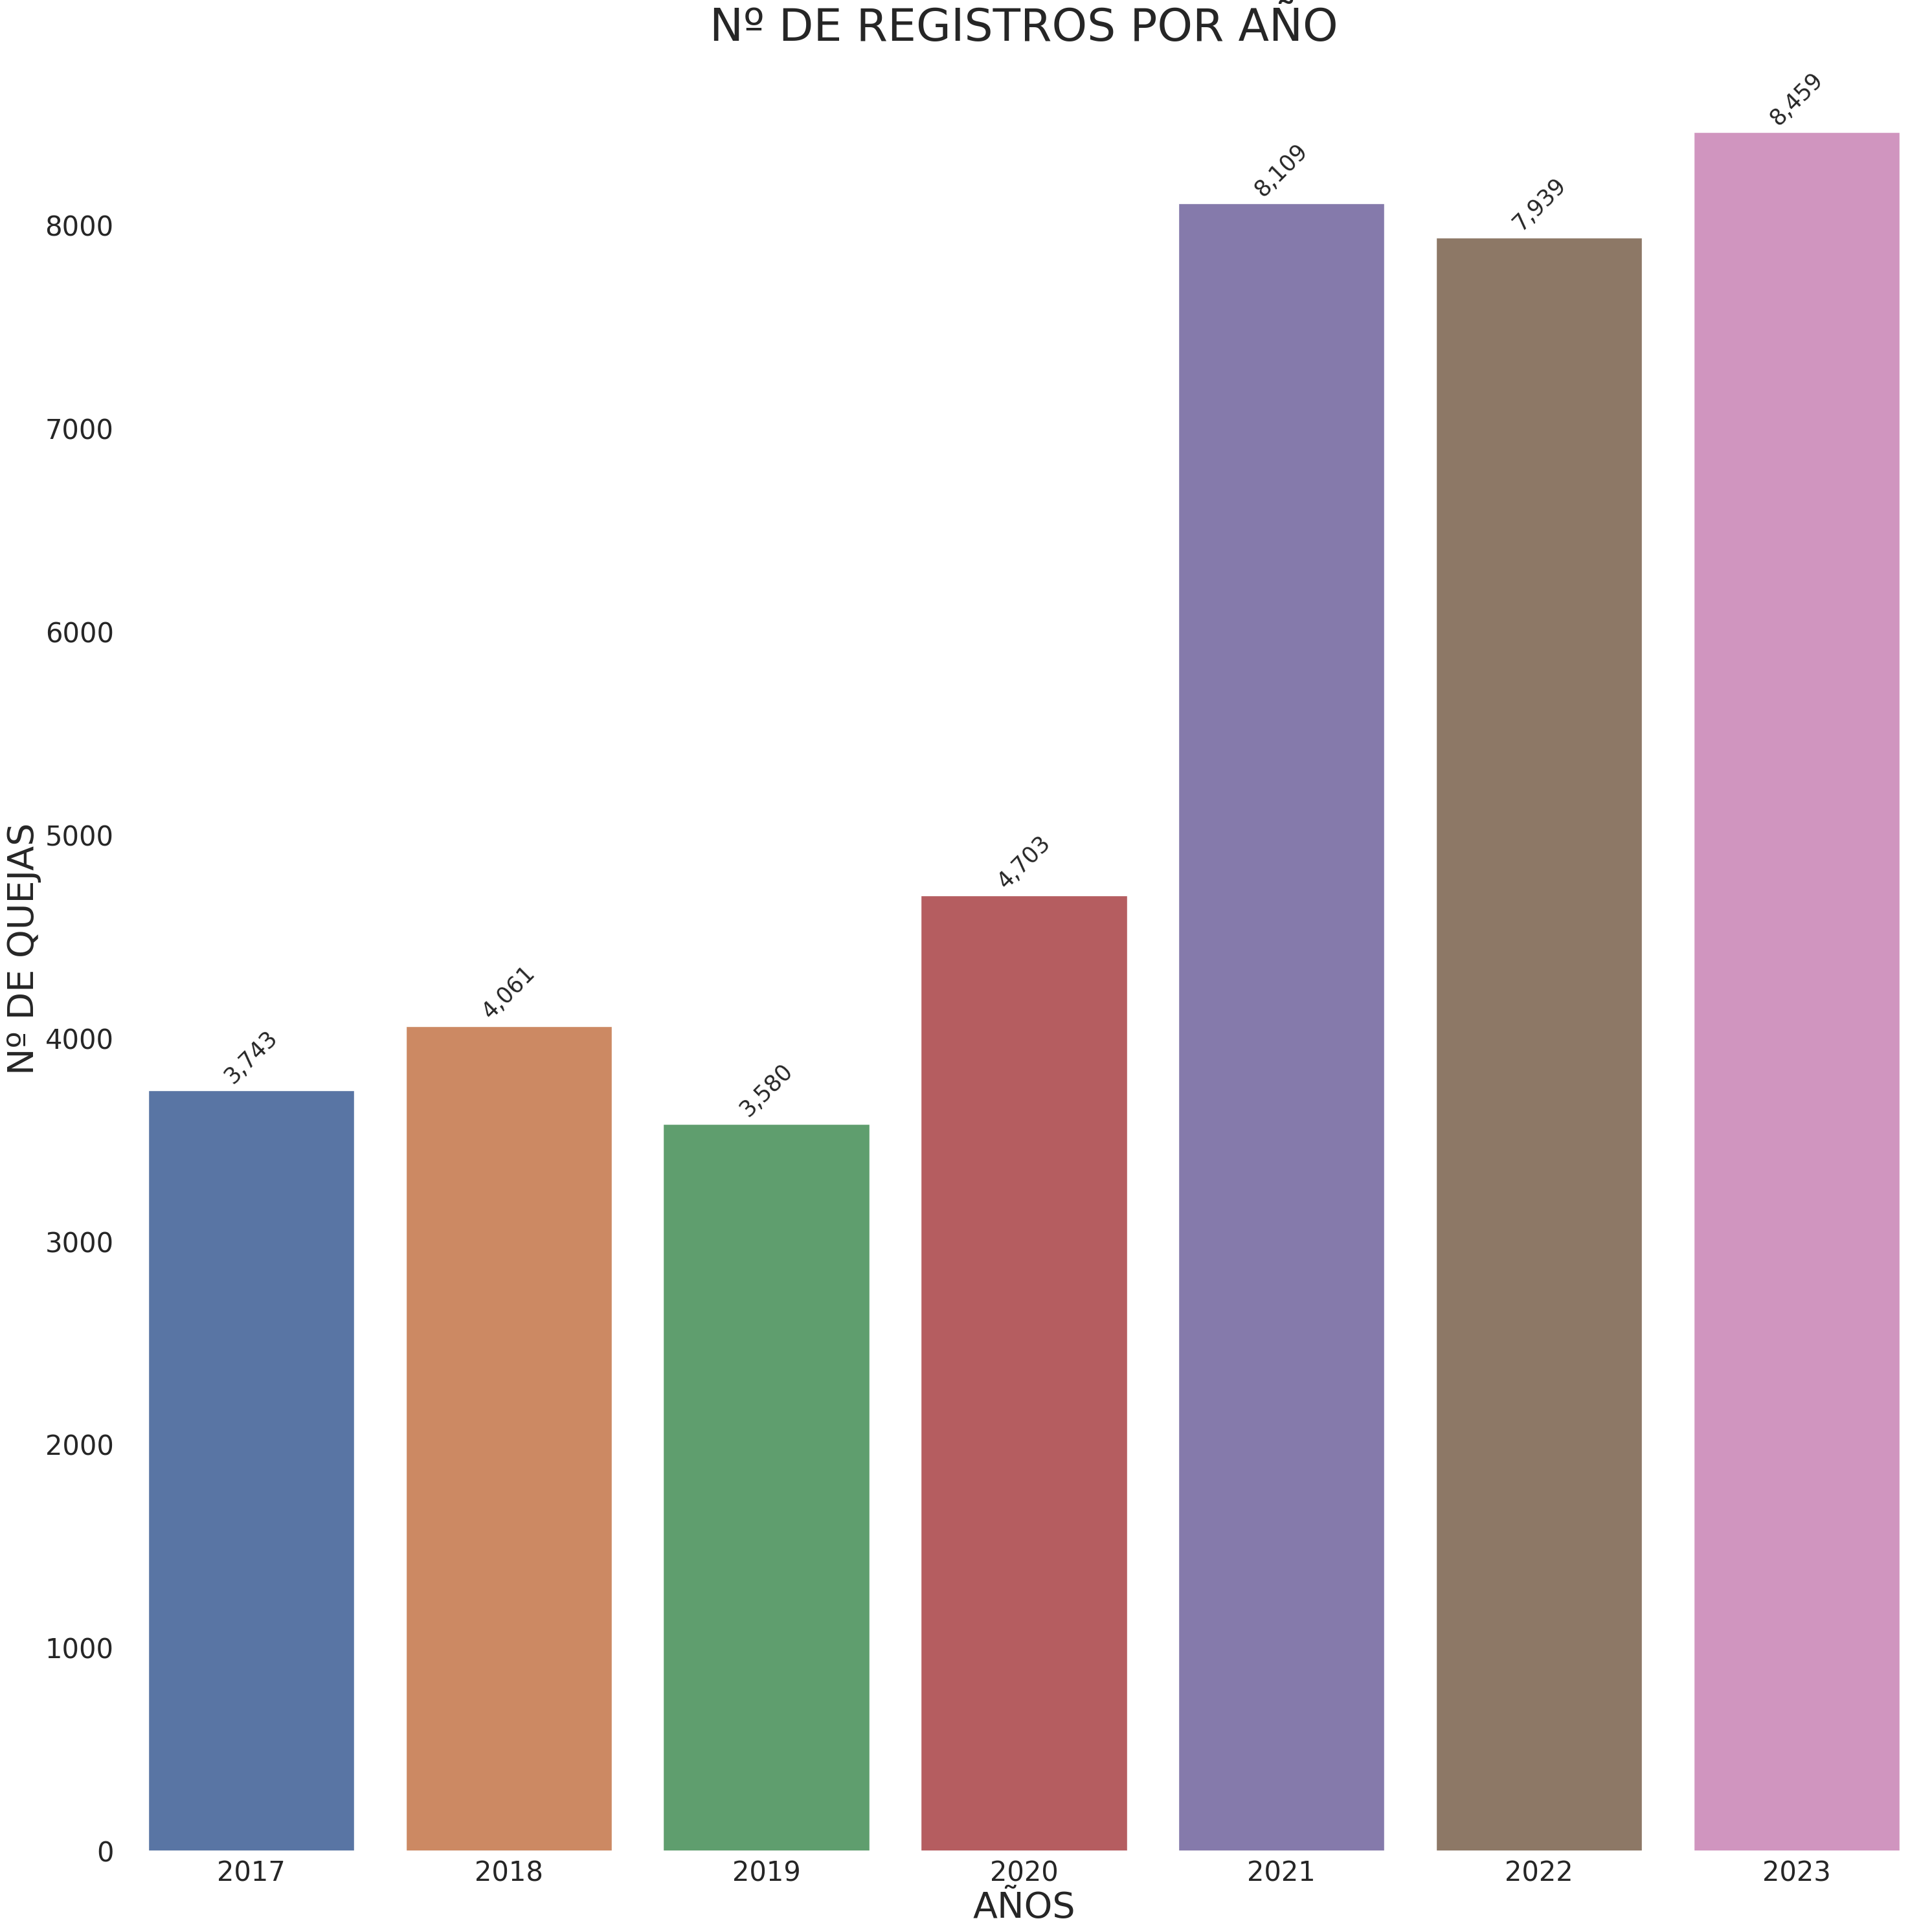

In [ ]:

#obtenemos el gráfico de número de reclamaciones por año
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(30,30)})
ax =sns.barplot(x = "fecha", y = "Count", data = df1)
ax.set_facecolor("white")
ax.bar_label( ax.containers[0],  fmt='{:,.0f}', fontsize=25, rotation=45, padding=3)
ax.set_title('Nº DE REGISTROS POR AÑO', fontsize=50)
ax.set_xlabel( "AÑOS" , fontsize = 40 )
ax.set_ylabel( "Nº DE QUEJAS" , fontsize = 40 )
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(30)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(30)
plt.tight_layout()
plt.show()

In [ ]:
#agrupamos ahora por departamento:

df1 =df.groupby(["service_name"], as_index = False).size().sort_values(['size'], ascending=False).head(10)

output= build_table(df1, 'blue_light')
IPython.display.HTML(output)


service_name,size
Policia Local,3398
Limpieza viaria,2435
Movilidad Urbana: Señalización,2372
Calzada,1971
Urbanismo,1681
Contenedores,1667
Parques y Jardines,1604
"Césped, arbustos, flor",1598
Alumbrado Publico,1512
Arbolado,1429


<ipython-input-11-2edc514755b6>:10: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(30)
<ipython-input-11-2edc514755b6>:11: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_rotation(45)
<ipython-input-11-2edc514755b6>:14: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(30)


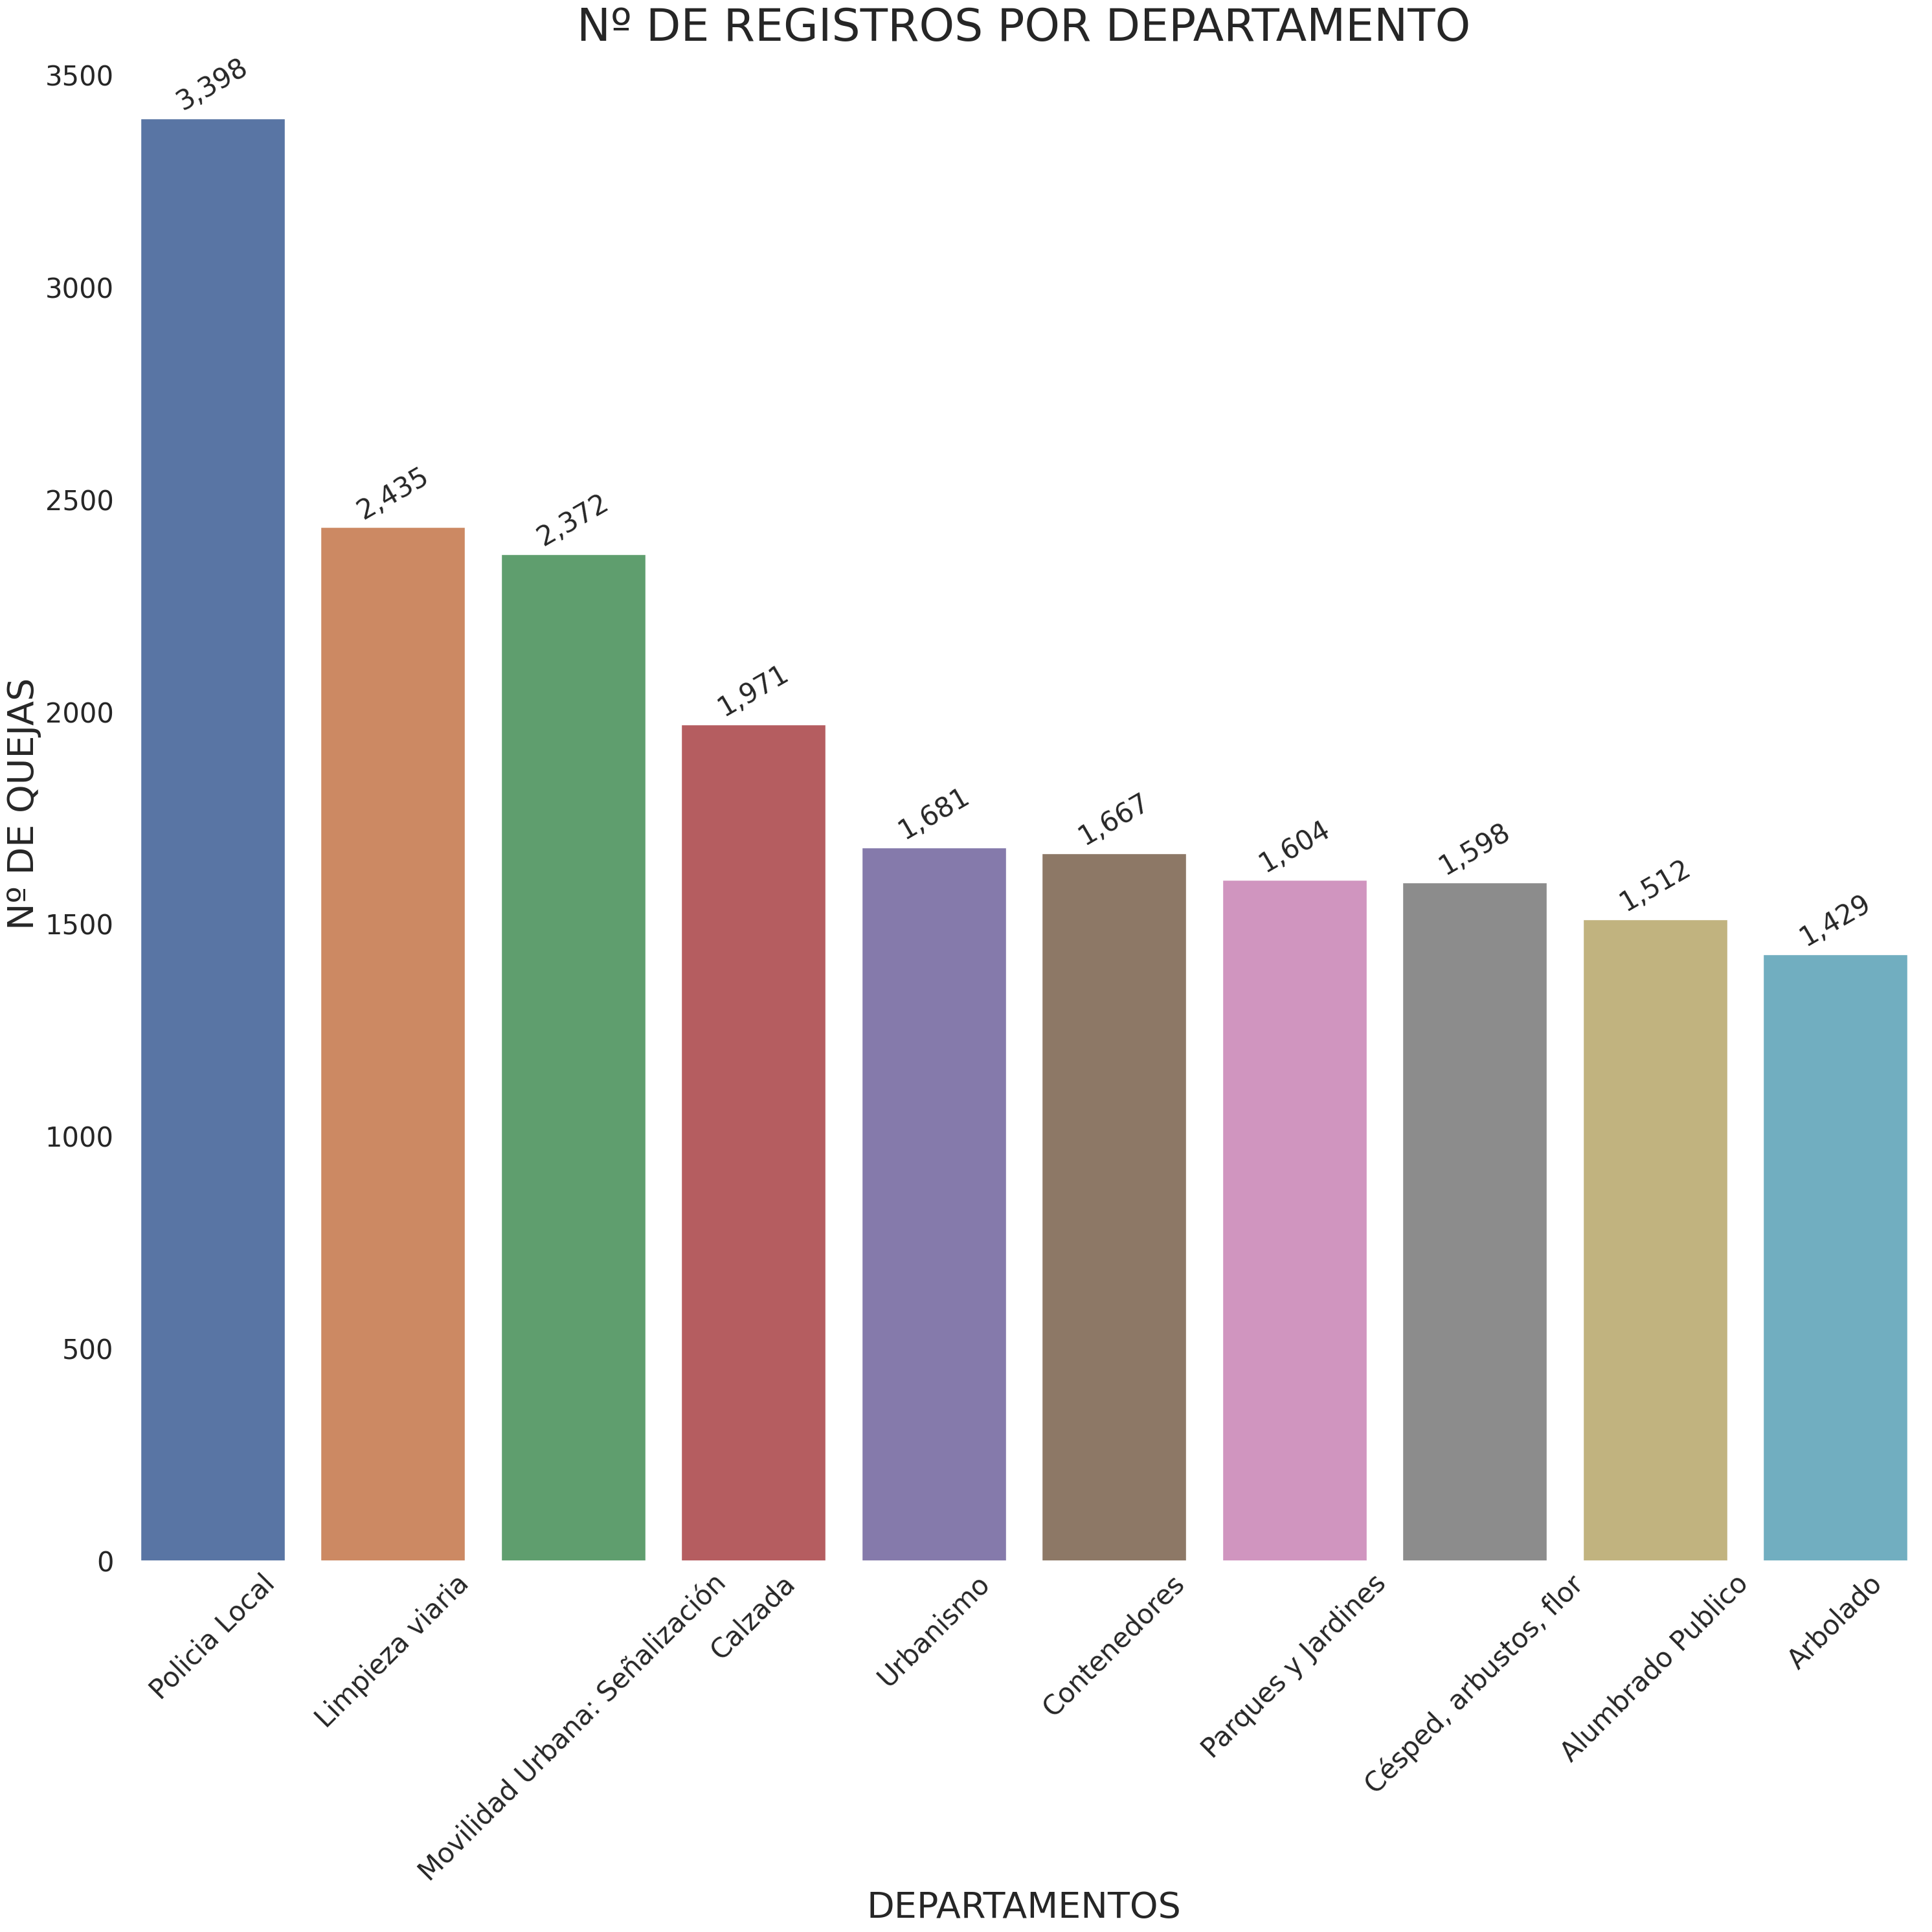

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(30,30)})
ax =sns.barplot(x = "service_name", y = "size", data = df1)
ax.set_facecolor("white")
ax.bar_label( ax.containers[0],  fmt='{:,.0f}', fontsize=30, rotation=30, padding=3)
ax.set_title('Nº DE REGISTROS POR DEPARTAMENTO', fontsize=50)
ax.set_xlabel( "DEPARTAMENTOS" , fontsize = 40 )
ax.set_ylabel( "Nº DE QUEJAS" , fontsize = 40 )
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(30)
    tick.label.set_rotation(45)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(30)
plt.tight_layout()
plt.show()



In [ ]:

servicios = df.groupby(["service_name","service_code", df['fecha'].dt.year], as_index = False).size().sort_values(['fecha', 'size'], ascending=False).groupby('fecha').head(3)
anios = servicios.fecha.unique().tolist()

servicios.reset_index(drop = True, inplace = True)

output= build_table(servicios, 'blue_light')
IPython.display.HTML(output)




                            service_name  service_code  fecha  size    color
0                 Césped, arbustos, flor           180   2023   764  crimson
1   Movilidad Urbana. Transporte Público      97550336   2023   667   orange
2                          Policia Local       4849666   2023   560     blue
3                     Parques y Jardines       4849671   2022   879   indigo
4                          Policia Local       4849666   2022   697     blue
5                        Limpieza viaria           250   2022   553   purple
6                          Policia Local       4849666   2021   700     blue
7                                Calzada            60   2021   512    green
8                               Arbolado           170   2021   502  magenta
9                          Policia Local       4849666   2020   527     blue
10                               Calzada            60   2020   302    green
11        Movilidad Urbana: Señalización       1000007   2020   288     pink

<ipython-input-11-69b81851aa34>:29: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(15)
<ipython-input-11-69b81851aa34>:31: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(15)
<ipython-input-11-69b81851aa34>:29: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(15)
<ipython-input-11-69b81851aa34>:31: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(15)
<ipython-input-11-69b81851aa34>:29: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize

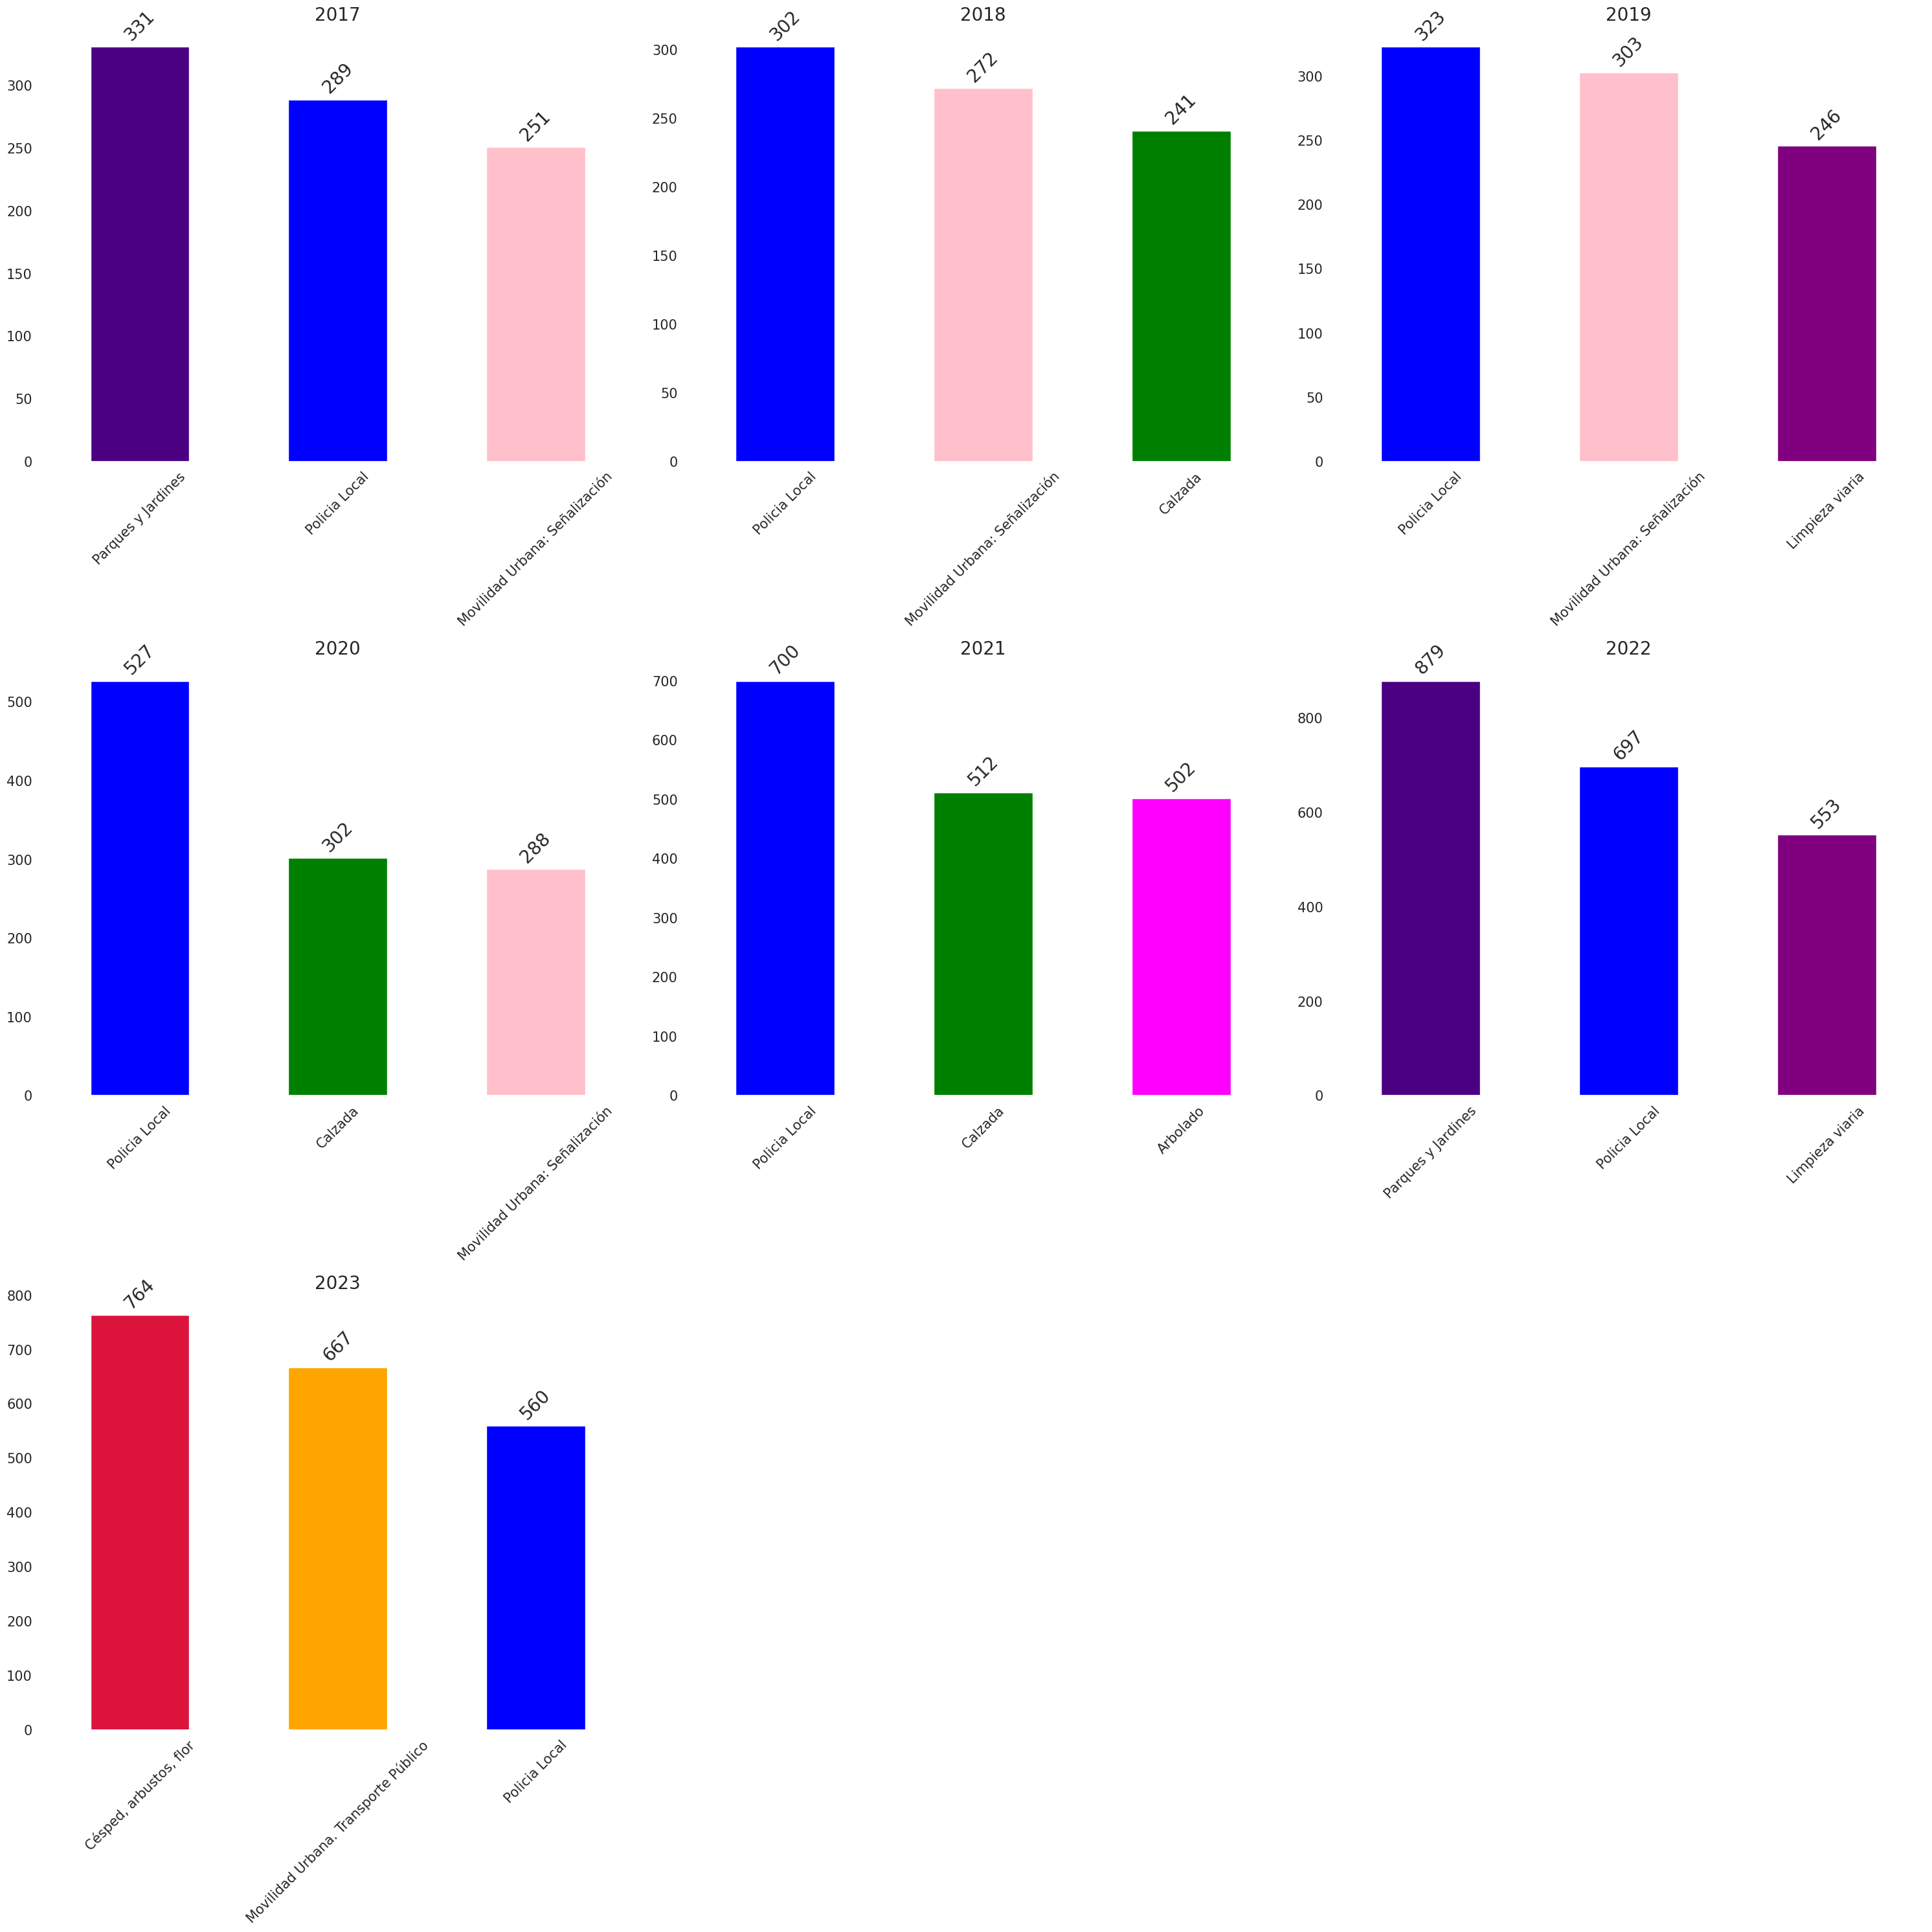

In [ ]:



serviciox = servicios

servicios_code = pd.DataFrame(serviciox.service_code.unique(), columns = ['service_code'])
coloreando =['crimson', 'orange', 'blue','indigo', 'purple', 'green', 'magenta','pink']
servicios_code["color"]= coloreando[0:len(servicios_code)]
serviciox = pd.merge(serviciox, servicios_code, how = "left", on="service_code")
print(serviciox)


plt.figure(figsize=(30,30))
plot_number = 1
fecha = serviciox.fecha.unique().tolist()
fecha.sort()

for fechax in fecha:

    ax = plt.subplot(3, 3, plot_number)
    ax.set_facecolor("white")

    serviciox[serviciox.fecha==fechax].plot.bar(x='service_name', y='size', ax=ax, label=fechax, legend=False, rot= 45, color =serviciox[serviciox.fecha==fechax].color)
    ax.bar_label( ax.containers[0],  fmt='{:,.0f}', fontsize=20, rotation=45, padding=3)

    ax.set_title(fechax, fontsize=20)
    ax.set_xlabel("", fontsize=30)

    plt.xticks(fontsize=20)

    for tick in ax.xaxis.get_major_ticks():
      tick.label.set_fontsize(15)
    for tick in ax.yaxis.get_major_ticks():
      tick.label.set_fontsize(15)

    plot_number = plot_number + 1
plt.tight_layout()
plt.show()



In [ ]:
##############################################

df = pd.read_excel("/content/train_reclasificado.xlsx")


df["requested_datetime"] = df["requested_datetime"].apply(lambda x: x[0:10] )
df["fecha"] =  pd.to_datetime(df["requested_datetime"], format='%Y-%m-%d')

servicios = df.groupby(["service_name","service_code", df['fecha'].dt.year], as_index = False).size().sort_values(['fecha', 'size'], ascending=False).groupby('fecha').head(3)
anios = servicios.fecha.unique().tolist()


servicios.reset_index(drop = True, inplace = True)


output= build_table(servicios, 'blue_light')
IPython.display.HTML(output)

service_name,service_code,fecha,size
Parques y Jardines,4849671,2023,2218
Limpieza Pública,4849672,2023,1400
Infraestructuras:Conservacion,4849669,2023,721
Parques y Jardines,4849671,2022,1970
Limpieza Pública,4849672,2022,1259
Infraestructuras:Conservacion,4849669,2022,814
Parques y Jardines,4849671,2021,1965
Limpieza Pública,4849672,2021,1132
Infraestructuras:Conservacion,4849669,2021,1002
Parques y Jardines,4849671,2020,855


<ipython-input-12-90148441d230>:40: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(15)
<ipython-input-12-90148441d230>:42: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(15)
<ipython-input-12-90148441d230>:40: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(15)
<ipython-input-12-90148441d230>:42: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(15)
<ipython-input-12-90148441d230>:40: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize

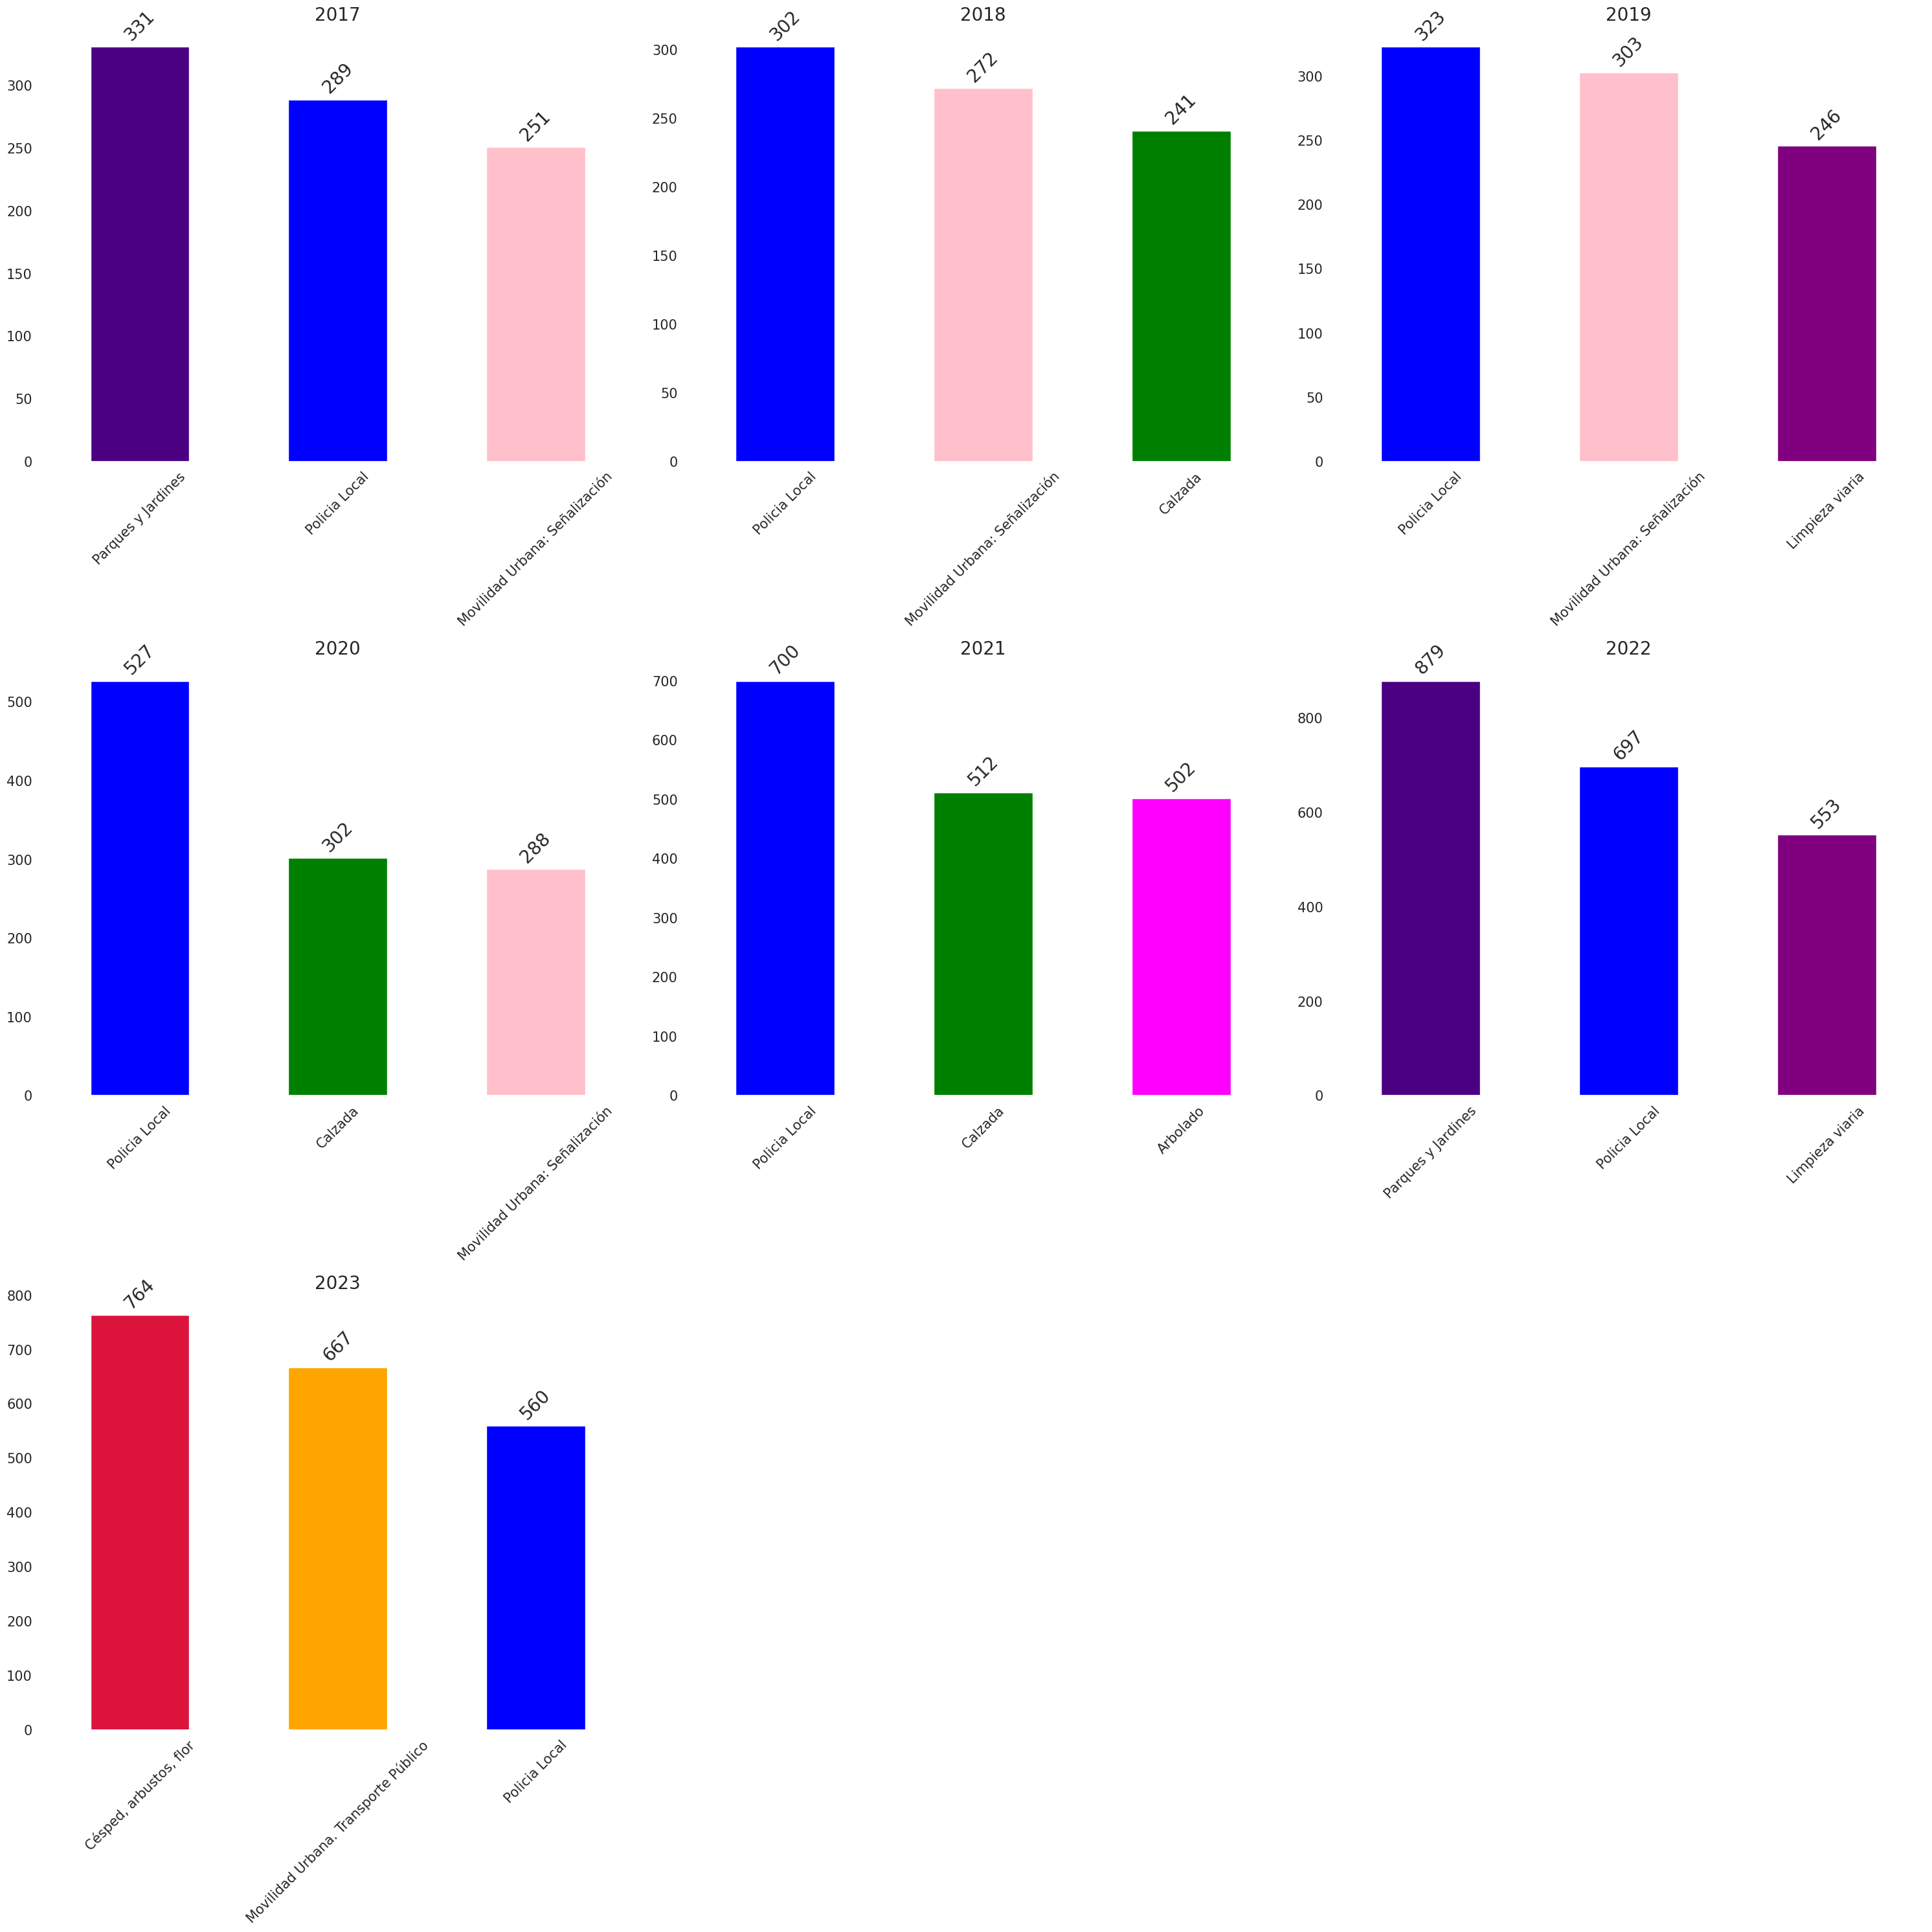

In [ ]:



serviciox = pd.DataFrame()
serviciox = servicios

servicios_code = pd.DataFrame(serviciox.service_code.unique(), columns = ['service_code'])


coloreando =['crimson', 'orange', 'blue','indigo', 'purple', 'green', 'magenta','pink']


servicios_code["color"]= coloreando[0:len(servicios_code)]


serviciox = pd.merge(serviciox, servicios_code, how = "left", on="service_code")



plt.figure(figsize=(30,30), facecolor='white')


plot_number = 1



fecha = serviciox.fecha.unique().tolist()
fecha.sort()
for fechax in fecha:

    ax = plt.subplot(3, 3, plot_number)
    ax.set_facecolor("white")

    serviciox[serviciox.fecha==fechax].plot.bar(x='service_name', y='size', ax=ax, label=fechax, legend=False, rot= 45, color =serviciox[serviciox.fecha==fechax].color)
    ax.bar_label( ax.containers[0],  fmt='{:,.0f}', fontsize=20, rotation=45, padding=3)

    ax.set_title(fechax, fontsize=20)
    ax.set_xlabel("", fontsize=30)

    plt.xticks(fontsize=20)

    for tick in ax.xaxis.get_major_ticks():
      tick.label.set_fontsize(15)
    for tick in ax.yaxis.get_major_ticks():
      tick.label.set_fontsize(15)

    plot_number = plot_number + 1
plt.tight_layout()
plt.show()



/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


['Césped, arbustos, flor', 'Movilidad Urbana. Transporte Público', 'Policia Local']
hola [Text(1, 0, '1'), Text(4, 0, '4'), Text(5, 0, '5')]
['Parques y Jardines', 'Policia Local', 'Limpieza viaria']
hola [Text(1, 0, '1'), Text(4, 0, '4'), Text(5, 0, '5')]
['Policia Local', 'Calzada', 'Arbolado']
hola [Text(1, 0, '1'), Text(4, 0, '4'), Text(5, 0, '5')]
['Policia Local', 'Calzada', 'Movilidad Urbana: Señalización']
hola [Text(1, 0, '1'), Text(4, 0, '4'), Text(5, 0, '5')]
['Policia Local', 'Movilidad Urbana: Señalización', 'Limpieza viaria']
hola [Text(1, 0, '1'), Text(4, 0, '4'), Text(5, 0, '5')]
['Policia Local', 'Movilidad Urbana: Señalización', 'Limpieza viaria']
hola [Text(1, 0, '1'), Text(4, 0, '4'), Text(5, 0, '5')]
['Parques y Jardines', 'Policia Local', 'Movilidad Urbana: Señalización']
hola [Text(1, 0, '1'), Text(4, 0, '4'), Text(5, 0, '5')]


<function matplotlib.pyplot.show(close=None, block=None)>

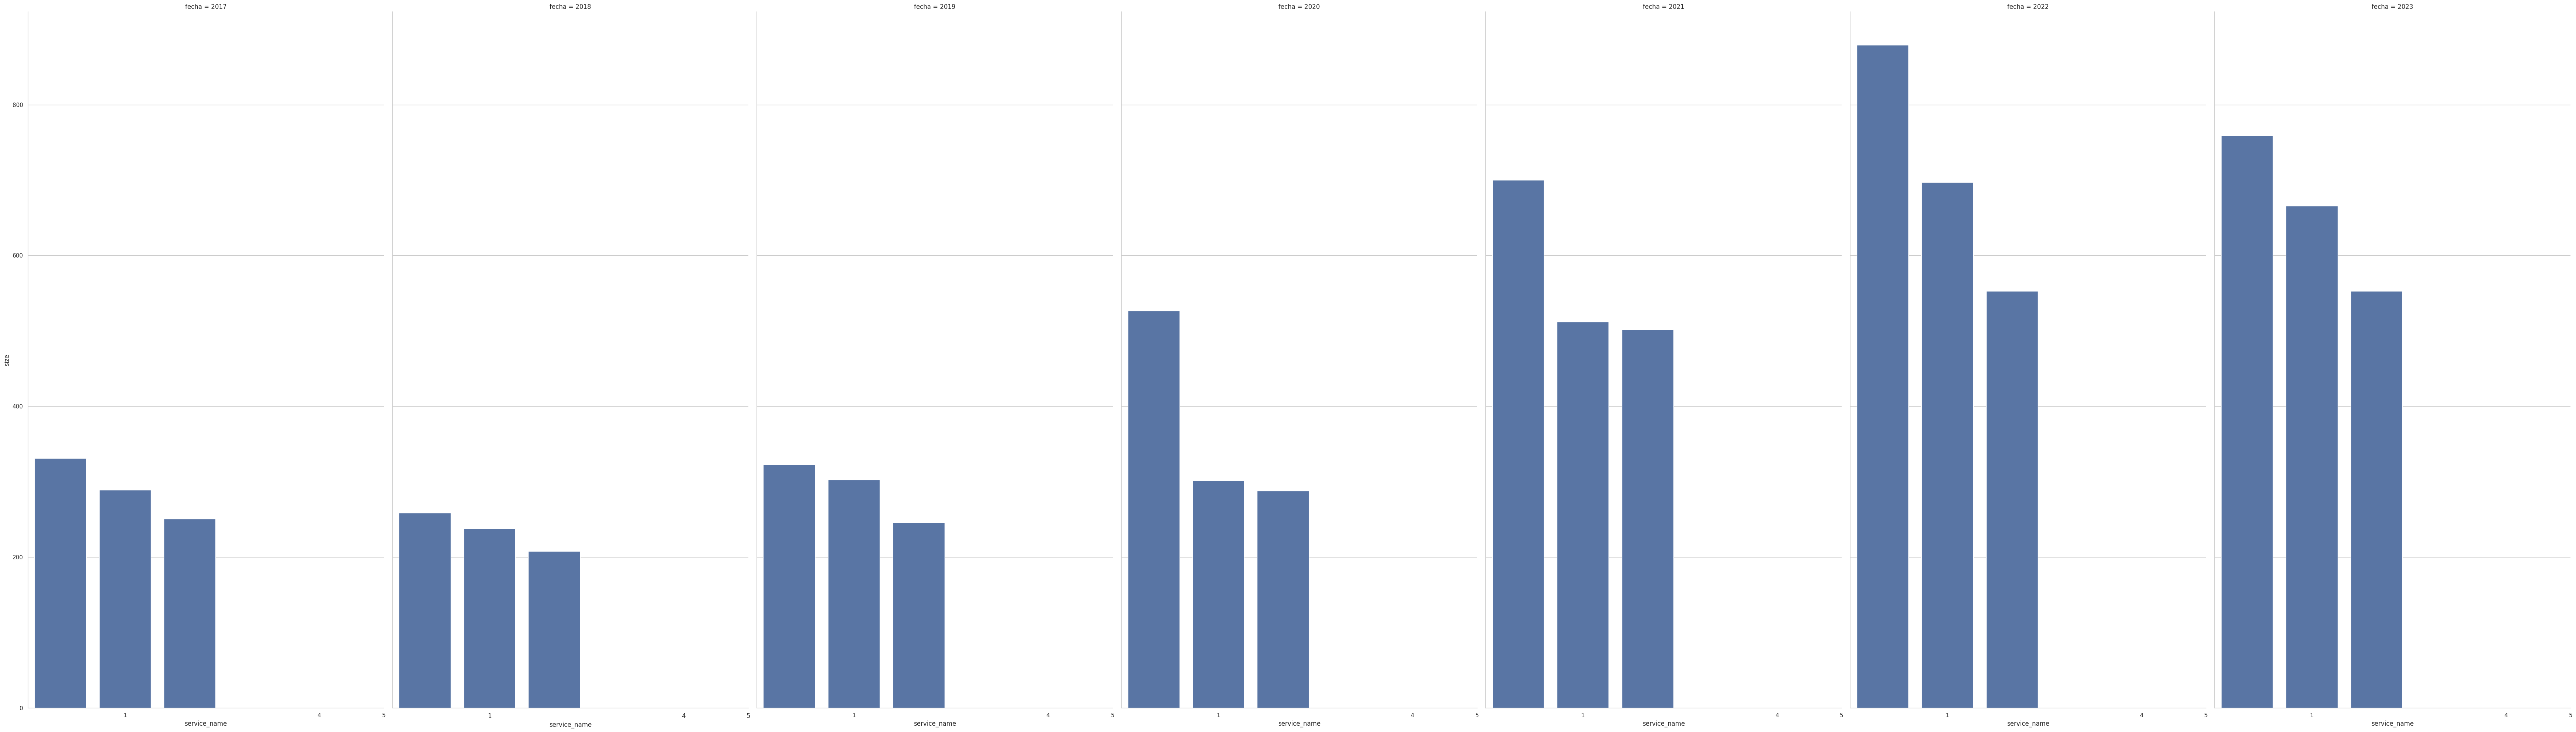

In [ ]:
g = sns.FacetGrid(servicios, col="fecha", height=20, aspect=.5)
#g.map(sns.barplot, "service_name", "size", order=anios)

g.map(sns.barplot, "service_name", "size")

lista = servicios.fecha.unique().tolist()
ticks = []
for i in range(0, len(lista)):
    #print(i)
    #print(len(lista))
    anyo =lista[i]
    #print(lista[i])
    print(servicios.loc[servicios.fecha == anyo, 'service_name'].to_list())
    ticks.append(servicios.loc[servicios.fecha == anyo, 'service_name'].to_list())
    #print(g.axes[i])

    #g.axes[0,i].set_xticklabels(servicios.loc[servicios.fecha == anyo, 'service_name'].to_list())
    g.axes[0,1].set_xticks([1,4,5])
    g.axes[0,1].set_xticklabels([1,4,5], fontsize=12)
    print("hola", g.axes[0,i].get_xticklabels())
    #print(len(g.axes))
    #print(g.axes)

print(g.axes.flat)


'''
plt.sca(g.axes[0, 2])
plt.xticks(range(3), ['A', 'Big', 'Cat'], color='red')
'''
g.tight_layout()

plt.show



